<a href="https://colab.research.google.com/github/N3wBaz/ml-intro/blob/main/ml-intro/3_linear_regression/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear regression

This assignment is dedicated to Linear regression. 12 task, 30 points max.

By focusing on predicting different features of football players,
you will:
* gain understanding of mathematics behind Linear Regression model
* and become familiar with using `sklearn` library for solving this kind of tasks

In the assignment we will:
* build Linear regression models with 1 and many variables
* use both library methods and manual calculations using mathematical formulas
* implement main regression metrics to evaluate performance of our models
* explore limitations of classical linear regression

### Notes:
* do not modify `assert` blocks in code. They are used to check your results
    

### Data
- In this notebook we will work with Football Player attributes per each match played.
  
  Data is taken from [European Soccer Database](https://www.kaggle.com/hugomathien/soccer) dataset. 
  
  The table used is `Player_Attributes`.


### Materias

Start with the assignment first. Use materials below as references when needed.

* NumPy:
    - [quickstart](https://numpy.org/doc/stable/user/quickstart.html)
    - [api reference](https://numpy.org/doc/stable/reference/index.html)
    

* Pandas:
    - [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html)
    - guide on [groupby.transform](https://pandas.pydata.org/docs/user_guide/groupby.html#transformation). 
      used in one of tasks on data preprocessing
    - [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
    

* sklearn:
    - [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) class documentation
    - guide on [Linear models](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)


* Matplotlib:
    - [cheatsheet](https://matplotlib.org/cheatsheets/)
    - examples of [main plot types](https://matplotlib.org/stable/plot_types/index.html)
    - [scatter plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) documentation

Файл создан **google collaboratory**. Поэтому пути и все остальное я закомментил так как они все равно не будут работать. Если понадобиться будьте добры вставьте путь к файлу **player_attributes.csv** в переменную data_root_dp. Спасибо

In [ ]:
import os

import numpy as np
import pandas as pd
pd.options.display.max_rows = 200
pd.options.display.max_columns = 100
pd.options.mode.chained_assignment = 'raise'  # forbid chained assignment to prevent implicit errors

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7, 6)  # set default figure size

import seaborn as sns
sns.set(font_scale=1.1)  # increase default font scale and set seaborn's plot style

from typing import List, Iterable

In [216]:
# from google.colab import drive
# drive.mount('/content/gdrive/')

## Data Processing

In [215]:
# data_root_dp = os.path.join('..', '..', 'data', 'soccer')  # change to yours path
# data_root_dp = "/content/gdrive/MyDrive/RS_school_course/3_linear_reg/soccer.zip"
# !unzip /content/gdrive/MyDrive/RS_school_course/3_linear_reg/soccer.zip
# print(f'data_root_dp: "{data_root_dp}"')

### read the raw SQL data
* you can run this code only once.<br>
  it will read `.sqlite` file and save extracted data to a more handy `.csv` format

In [ ]:
# import sqlite3

# open connection to .sqlite file
# data_sql_fp = os.path.join(data_root_dp, 'database.sqlite')
# print(f'will read from: "{data_sql_fp}"')
# con = sqlite3.connect(data_sql_fp)

# df = pd.read_sql('select * from Player_Attributes', con)  # run SQL-query
# print(f'shape: {df.shape}')
# con.close()  # close connection to .sqlite file

# # save to .csv
# out_fp = os.path.join(data_root_dp, 'tmp', 'player_attributes.csv')
# os.makedirs(os.path.dirname(out_fp), exist_ok=True)  # create directories if needed
# print(f'will save to: "{out_fp}"')
# df.to_csv(out_fp, index=False)

### read the  data

In [ ]:
data_root_dp = "/content/gdrive/MyDrive/RS_school_course/3_linear_reg/"
data_player_attributes_fp = os.path.join(data_root_dp, 'player_attributes.csv')
print(f'reading from: "{data_player_attributes_fp}"')
df = pd.read_csv(data_player_attributes_fp)
print(df.shape)

reading from: "/content/gdrive/MyDrive/RS_school_course/3_linear_reg/player_attributes.csv"
(183978, 42)


In [ ]:
df.dtypes

id                       int64
player_fifa_api_id       int64
player_api_id            int64
date                    object
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
interceptions          float64
positioning            float64
vision  

### basic data processing

In [ ]:
# there are 3 'id' columns in data. 
# we will use 'player_api_id' only
# and drop other 'id' columns.
redundant_key_columns = ['id', 'player_fifa_api_id']

# also we will drop categorical columns for this task.
categorical_columns = ['preferred_foot', 'attacking_work_rate', 'defensive_work_rate']

cols_to_drop = redundant_key_columns + categorical_columns
print(f'will drop following columns: {cols_to_drop}')
df.drop(columns=cols_to_drop, inplace=True)

# rename 'player_api_id' column to shorter one: 'id'.
df.rename(columns={'player_api_id': 'id'}, inplace=True)

# cast string values to datetime
df['date'] = pd.to_datetime(df['date'])

# drop records that contain only NaNs in features
all_features = set(df.columns).difference(['id', 'date'])  # all columns without key columns
df.dropna(subset=all_features, how='all', inplace=True)

print(f'df.shape: {df.shape}')

will drop following columns: ['id', 'player_fifa_api_id', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate']
df.shape: (183142, 37)


In [ ]:
# the dataset we're working with migh get updated in future (new records might be added).
# thus we remove any records with date larger than the current max date in data (2016-07-07)
# for compatibility with current version of notebook.
df.drop(index=df[df['date'] > '2016-07-07'].index, inplace=True)
print(df.shape)

(183142, 37)


### drop duplicates

* we should **ALWAYS** understand what our data represents


* here we are dealing with Football Player attributes per each match played.

  so we expect the data to have `(id, date)` as a key
  
  
* let's check whether our assumption holds

In [ ]:
df.duplicated(['id', 'date']).value_counts()

False    183142
dtype: int64

* there are no duplicates if considering `(id, date)` pair as a key

In [ ]:
df.duplicated('id').value_counts()

True     172082
False     11060
dtype: int64

* and there are duplicates if considering only `id` column as a key

* so our assumption holds. but let's work only with latest stats for each player

#### **Task 1**. Keep only latest data for each player (1 point)

* HINT: you can use 

  `df[<new_column>] = df.groupby(<key_to_aggregate>)[<column>].transform('max')` 
  
  to get the `max` value of `<column>` for each group specified by `<key_to_aggregate>` columns.
  
  then you'll have to filter rows using `<column>` and `<new_column>` values
  

* don't forget to remove any additional columns you introduce here

In [ ]:
# df.groupby('id')['date'].transform('max')
df = df.sort_values(by=['id', 'date'],ascending=[True,False]).drop_duplicates('id', keep='first')


In [ ]:
# # your code here

# df['...'] = ...
# df.drop(...)



In [ ]:
assert df.duplicated(['id']).sum() == 0
assert df.shape == (11060, 37)

In [ ]:
# no longer need 'id' and 'date' columns
df.drop(columns=['id', 'date'], inplace=True)

### NaNs

In [ ]:
df.isna().sum()

overall_rating          0
potential               0
crossing                0
finishing               0
heading_accuracy        0
short_passing           0
volleys               478
dribbling               0
curve                 478
free_kick_accuracy      0
long_passing            0
ball_control            0
acceleration            0
sprint_speed            0
agility               478
reactions               0
balance               478
shot_power              0
jumping               478
stamina                 0
strength                0
long_shots              0
aggression              0
interceptions           0
positioning             0
vision                478
penalties               0
marking                 0
standing_tackle         0
sliding_tackle        478
gk_diving               0
gk_handling             0
gk_kicking              0
gk_positioning          0
gk_reflexes             0
dtype: int64

* do you see any pattern in how NaNs are distributed?

In [ ]:
df.isna().sum(axis=1).value_counts()

0    10582
7      478
dtype: int64

#### **Task 2**. Drop rows that contain NaNs (1 point)

In [ ]:
# your code here
df.dropna(inplace=True)

In [ ]:
assert df.isna().sum().sum() == 0

## **Task 3**. Implement main regression metrics yourself (up to 4 points):
* Mean Squared Error (mse) - **(1 point)**
* Mean Absolute Error (mae) - **(1 point)**
* Mean Absolute Percentage Error (mape) - **(1 point)**
* R-squared (r2) - **(1 point)**


#### bonus point: MAPE is implemented in such way to take possible 0 in `y_true` into account
Hints:

* you should divide on 
  $ \hat{y}_{true} = (\hat{y}_{true}^{(0)}, \hat{y}_{true}^{(1)}, ..., \hat{y}_{true}^{(n)}) $,
  
  where $ \ \ \hat{y}_{true}^{(i)} = max(\ \ | y_{true}^{(i)} |, \ \ \epsilon), \ \ \epsilon > 0, \ \ y_{true}^{(i)} \in \mathbb R $
  

* for compatibility with `sklearn` take 

  `eps = np.finfo(np.float64).eps`
  
  
#### bonus point: $R^2$ is implemented in such way to take possible 0 in numerator and denominator into account
Hints:

* recall the formula: $ R^2 = 1 - \dfrac{SS_{residuals}}{SS_{total}} $


* you should return:

    $
    \begin{cases}
     R^2 & \text{ if } SS_{residuals} \ne 0 \text{ and  } SS_{total} \ne 0 
     \\
     0 & \text{ if } SS_{residuals} \ne 0 \text{ and  } SS_{total} = 0 
     \\
     1 & \text { otherwise }
    \end{cases}
    $
    

* for a better understanding of $R^2$ coefficient 
  try to explain to yourself why we return those values in each of edge cases

In [ ]:
# we use '*' in the beggining of each function signature
# to forbid positional arguments and enforce the use of kwargs.
# this helps to avoid mistake when arguments are passed in wrong order.

# write down code instead of raising NotImplementedError in each of functions below.


def mse(*, y_true, y_pred):
    # raise NotImplementedError()
    return (np.sum((y_true - y_pred) ** 2) / len(y_true)).squeeze()
    
def mae(*, y_true, y_pred):
    # raise NotImplementedError()
    return (np.sum(np.abs(y_true - y_pred)) / len(y_true)).squeeze()
    
def mape(*, y_true, y_pred):
    eps = np.finfo(np.float64).eps
    # raise NotImplementedError()
    return (np.sum(np.abs((y_true - y_pred) / (y_true + eps))) / len(y_true)).squeeze()
    
def r2(*, y_true, y_pred):
    eps = np.finfo(np.float64).eps
    ss_total = (np.sum((y_true - np.mean(y_true)) ** 2)).squeeze()
    ss_res = (np.sum((y_true - y_pred) ** 2)).squeeze()

    if ss_res == 0:
        return 1

    if ss_total == 0:
        return 0


    return 1 - ss_res / ss_total

### Validate your implementations are correct

* we'll use synthetic data for this task


In [ ]:
from sklearn.metrics import (
    mean_squared_error as mse_lib, 
    mean_absolute_error as mae_lib,
    mean_absolute_percentage_error as mape_lib,
    r2_score as r2_lib
)

In [ ]:
def compare_metrics(fn, fn_lib, y_true, y_pred, n_digits=9):
    """ Print and compare values of custom and library functions using given precision. """
    m_fn = fn(y_true=y_true, y_pred=y_pred)
    m_fn_lib = fn_lib(y_true=y_true, y_pred=y_pred)
    print(f'{fn.__name__} custom : {m_fn}')
    print(f'{fn.__name__} library: {m_fn_lib}')
    print()
    assert round(m_fn, n_digits) == round(m_fn_lib, n_digits)

#### a case with a good fit

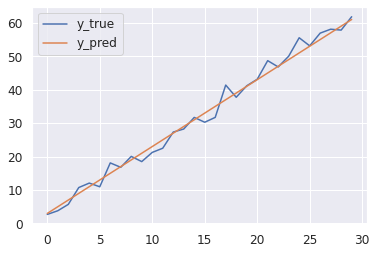

In [ ]:
n = 30
x = np.arange(n)
y_true = 2 * x + 3 + np.random.normal(loc=0, scale=2, size=n)
y_pred = 2 * x + 3

plt.plot(x, y_true, label='y_true')
plt.plot(x, y_pred, label='y_pred')
plt.legend();

In [ ]:
compare_metrics(mse, mse_lib, y_true=y_true, y_pred=y_pred)
compare_metrics(mae, mae_lib, y_true=y_true, y_pred=y_pred)
compare_metrics(mape, mape_lib, y_true=y_true, y_pred=y_pred)
compare_metrics(r2, r2_lib, y_true=y_true, y_pred=y_pred)
print('all tests passed')

mse custom : 4.010891214039342
mse library: 4.010891214039342

mae custom : 1.5682833249840562
mae library: 1.5682833249840562

mape custom : 0.07750594810984666
mape library: 0.07750594810984666

r2 custom : 0.9875157168884451
r2 library: 0.9875157168884451

all tests passed


#### 0s in target. MAPE should explode

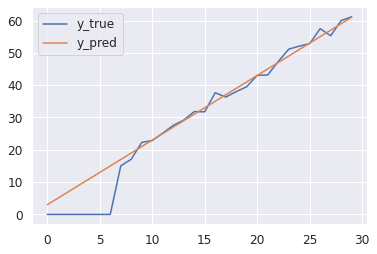

In [ ]:
n = 30
x = np.arange(n)
y_true = 2 * x + 3 + np.random.normal(loc=0, scale=2, size=n)
y_true[:7] = 0
y_pred = 2 * x + 3

plt.plot(x, y_true, label='y_true')
plt.plot(x, y_pred, label='y_pred')
plt.legend();

In [ ]:
compare_metrics(mse, mse_lib, y_true=y_true, y_pred=y_pred)
compare_metrics(mae, mae_lib, y_true=y_true, y_pred=y_pred)
compare_metrics(mape, mape_lib, y_true=y_true, y_pred=y_pred)
compare_metrics(r2, r2_lib, y_true=y_true, y_pred=y_pred)
print('all tests passed')

mse custom : 24.022320505653692
mse library: 24.022320505653692

mae custom : 2.928754168746289
mae library: 2.928754168746289

mape custom : 9457559217478042.0
mape library: 9457559217478042.0

r2 custom : 0.942117747241036
r2 library: 0.942117747241036

all tests passed


#### edge cases for R2

In [ ]:
# constant target value

n = 30
x = np.arange(n)
y_true = np.repeat(15, n)
y_pred = 2 * x + 3

compare_metrics(r2, r2_lib, y_true=y_true, y_pred=y_pred)
print('success')

r2 custom : 0
r2 library: 0.0

success


In [ ]:
# perfect fit

n = 30
x = np.arange(n)
y_true = 2 * x + 3 + np.random.normal(loc=0, scale=2, size=n)
y_pred = y_true

compare_metrics(r2, r2_lib, y_true=y_true, y_pred=y_pred)
print('success')

r2 custom : 1
r2 library: 1.0

success


### Define helper functions

In [ ]:
def get_metrics(*, y_true, y_pred) -> pd.Series:
    """ A helper function to return all metrics for given labels and predictions. """
    
    # if you didn't implement some metrics, comment them out for this function to work.
    return pd.Series({
        'mse': mse(y_true=y_true, y_pred=y_pred),
        'mae': mae(y_true=y_true, y_pred=y_pred),
        'mape': mape(y_true=y_true, y_pred=y_pred),
        'r2': r2(y_true=y_true, y_pred=y_pred),
    })

In [ ]:
def fit_and_evaluate(model, x_train, y_train, x_test, y_test) -> pd.DataFrame:
    """ 
    A helper function to: 
    * fit a passed model
    * and return metrics on train and test sets.
    """
    # fit the model
    model.fit(x_train, y_train)
    
    # return metrics as pd.DataFrame
    m = pd.DataFrame([
        get_metrics(y_true=y_train, y_pred=model.predict(x_train)),  # metrics for train set
        get_metrics(y_true=y_test, y_pred=model.predict(x_test))     # metrics for test set
    ], index=['train', 'test']
    )
    
    return m

## train/test split

* Split the data we have into Train and Test splits with 80%/20% proportion

In [ ]:
print(df.shape)
ix_split = int(0.8 * df.shape[0])
DF_TRAIN = df.iloc[:ix_split].copy()
DF_TEST = df.iloc[ix_split:].copy()
print(DF_TRAIN.shape, DF_TEST.shape)

(10582, 35)
(8465, 35) (2117, 35)


In [ ]:
def get_train_test_data(features: List[str], target: str) -> tuple:
    """
    Return x_train, y_train, x_test, y_test using 
    * global train/test split 
    * features and target provided.
    """
    # in general, it's a bad practice to use global variables. 
    # however, we use it here with caution for simplicity.
    return (
        DF_TRAIN[features].copy(), DF_TRAIN[target].copy(), 
        DF_TEST[features].copy(), DF_TEST[target].copy()
    )

## Linear regression with 1 variable

* Let's start with Linear Regression that predicts target variable 
  using only 1 predictor (independent variable)  

* We will try to predict `dribbling` variable using `short_passing` as a predictor

In [ ]:
target = 'dribbling'
features = ['short_passing']
x_train, y_train, x_test, y_test = get_train_test_data(features, target)

### Let's visualize our data first

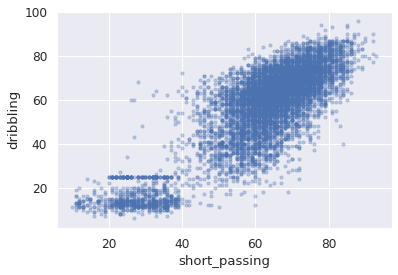

In [ ]:
plt.scatter(x=x_train, y=y_train, alpha=0.3, s=10);
plt.xlabel('short_passing');
plt.ylabel('dribbling');

* do you notice anything interesting on this plot?
* if so, how can we use it later to generate more accurate predictions?

### **Task 4**. Compute Pearson correlation coefficient between feature and target (1 pont)
Hint: you can use either `pd.Series.corr` method or `np.corrcoef` function

In [ ]:
# your code here
# Вариант 1
print(x_train.corrwith(y_train, method='pearson', axis=0).values[0])

# Вариант 2
print(x_train['short_passing'].corr(y_train, method='pearson'))



0.8279640733463399
0.8279640733463399


### Solve using `sklearn`

* we will use `LinearRegression` class from `sklearn` library 
  to fit a linear regression model and use it to generate prediction

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression(fit_intercept=True)
model.fit(x_train, y_train);

* explore fitted model parameters

In [ ]:
model_intercept = model.intercept_
model_slope = model.coef_[0]
print(f'model_intercept: {model_intercept}')
print(f'model_slope: {model_slope}')

model_intercept: -9.10702502271807
model_slope: 1.0707960273682111


* use fitted model to get predictions for test set

In [ ]:
model_preds = model.predict(x_test)
model_preds

array([57.28232867, 56.21153265, 57.28232867, ..., 43.36198032,
       55.14073662, 55.14073662])

* explore model quality on test set.

In [ ]:
print('model metrics on test set')
metrics_test_1 = get_metrics(y_true=y_test, y_pred=model_preds)
metrics_test_1

model metrics on test set


mse     123.543884
mae       8.808577
mape      0.168446
r2        0.512268
dtype: float64

* can you explain what those metic values mean?

#### **Task 5**. Calculate predictions for test set manually (1 point)

Above we used `LinearRegression.predict()` method to obtain predictions. 
Now let's do it manually!

Recall Linear Regression formula:

* $ \hat{y} = w_0 + w_1 \cdot x, $ 

    where:
    * $w_0$ is an intercept
    * $w_1$ is a slope
    * $x$ is a predictor
    * $\hat{y}$ is a predicted variable
  

* use intercept and slope values from fitted LinearRegression model

In [ ]:
# use `x_test` for calculations as is (it's a DataFrame with 1 column).
# do not convert it to Series or numpy array.

# your code here:

model_manual_preds = pd.DataFrame(model_intercept + model_slope * x_test['short_passing'])
model_manual_preds.head()

,short_passing
57104,57.282329
103000,56.211533
38673,57.282329
110656,10.167303
135840,52.999145


In [ ]:
assert isinstance(model_manual_preds, pd.DataFrame)

In [ ]:
# ensure our manual predictions are the same as model generated
assert np.allclose(model_preds, model_manual_preds.iloc[:, 0].to_numpy())
print('success')

success


#### **Task 6**. Plot test data and predicted values (1 point)

* use `plt.scatter` function as in example above.
* first build scatter plot for test data
* then build scatter plot with model predictions
* add plot title, axis names and legend

Hints:
* use `alpha` parameter to control opacity and `s` parameter to control size of points.
  this will make plot more readable
* use `label` parameter to add label to each set of points added to scatter plot
* use different color for model predictions. control with parameter `color`

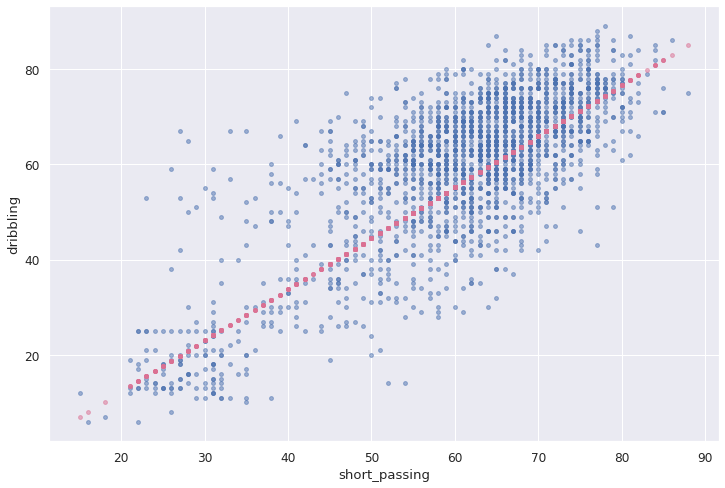

In [ ]:
# # your code here

plt.figure(figsize=(12,8))
plt.scatter(x=x_test, y=y_test, alpha=0.5, s=15 )
plt.scatter(x=x_test, y=model_preds, alpha=0.5, s=15, color = 'palevioletred' )
plt.xlabel('short_passing');
plt.ylabel('dribbling');

### **Task 7**.  Fit regression model manually (3 points)

So far we have used `sklearn` library to fit linear regression model and obtain predictions. Good job!

Recall the formula of Linear regression for 1 variable:

* $ \hat{y} = w_0 + w_1 \cdot x $

Now let's try to fit the model **ourselves**.

### Theory

Assume our dataset consists of _n_ samples.

To fit a Linear regression model means to find the best set of parameters - 
$(w_0, w_1)$ that minimizes a **Loss function**.<br>
In case of Linear regression we choose **Residual sum of squares (RSS)** as a Loss function:

* $ L(w, x, y) = RSS(w, x, y) = \sum_{i=0}^{n-1} (y_i - \hat{y}_i ) ^ 2 \rightarrow min $

That is conceptually the same as minimizing Mean squared error (MSE):

* $ MSE(w, x, y) = \dfrac{1}{n} \sum_{i=0}^{n-1} (y_i - \hat{y}_i ) ^ 2 \rightarrow min $

Here:
* $y = (y_0, y_2, ..., y_{n-1}) $ - is a vector of target values we want to predict.
  1 value per each sample in our dataset that consists of _n_ samples
* $\hat{y} = (\hat{y}_0, \hat{y}_2, ..., \hat{y}_{n-1}) $ - is a vector of predictions 
* $\hat{y}_i = w_0 + w_1 \cdot x_i$ - is an individual prediction for _i_-th sample in a dataset

---

Best parameters $w_0$ and $w_1$ can be found using **following formulas**:

* $w_0 = \bar{y} - w_1 \cdot \bar{x}$


* $w_1 = \dfrac{\sum_{i=0}^{n-1}(x_i - \bar{x}) y_i}{\sum_{i=0}^{n-1}(x_i - \bar{x})^2}$


* where:
 * $\bar{x} = \dfrac{1}{n} \sum_{i=0}^{n-1}x_i$ - is the mean of vector $x$
 
 * $\bar{y} = \dfrac{1}{n} \sum_{i=0}^{n-1}y_i$ - is the mean of vector $y$
 
You should use these formulas to find the best model parameters in this task.
 
---

If you want to learn more you can refer to 
[Simple linear regression](https://en.wikipedia.org/wiki/Simple_linear_regression) wiki-page.

It contains analagous formula for $w_1$ coefficient that is conceptually the same 
(so it's not a bug in our formula provided above).

### Implementation

* convert pd.DataFrame and pd.Series (`x_train` and `y_train` respecitvely) to numpy-arrays

In [ ]:
x = x_train.iloc[:, 0].to_numpy()
y = y_train.to_numpy()

* calculate model parameters ($w_1$ - slope and $w_0$ - intercept) using formulas given above

In [ ]:
# # your code here:

manual_slope = np.sum((x - x.mean()) * y) / np.sum((x - x.mean()) ** 2)
manual_intercept = y.mean() - manual_slope * x.mean()

In [ ]:
print(f'manual_intercept: {manual_intercept}')
print(f'manual_slope: {manual_slope}')


manual_intercept: -9.107025022717998
manual_slope: 1.07079602736821


In [ ]:
assert round(model_intercept, 9) == round(manual_intercept, 9)
assert round(model_slope, 9) == round(manual_slope, 9)
print('success')

success


## Linear regression with multiple variables

* Now let's use Linear Regression model that uses multiple variables

* We will try to predict `dribbling` variable using 
  `['ball_control', 'short_passing', 'strength', 'sprint_speed']` features

In [ ]:
target = 'dribbling'
features = ['ball_control', 'short_passing', 'strength', 'sprint_speed']
x_train, y_train, x_test, y_test = get_train_test_data(features, target)

### Let's explore the data first

In [ ]:
cols = features + [target]
print(cols)

['ball_control', 'short_passing', 'strength', 'sprint_speed', 'dribbling']


#### **Task 8** (1 point)

Build pairwise correlation matrix for selected features and target. Visualize it with heatmap.

Hints:
* use `DF_TRAIN` to build statistics (`x_train` contains only features. target is in `y_train`)
* use `pd.DataFrame.corr()` to build correlation matrix
* use `sns.heatmap` to build heatmap from correlation matrix. 
  * use `center` parameter to center your heatmap's colormap at 0
  * use diverging colormap (`cmap` parameter)<br>
    you can find the list of diverging colormaps
    [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html#diverging)<br>
    the reason is that we need to easily find both negative and positive correlations.
  * use `annot` parameters to add numbers to the plot.
* you can print `pd.DataFrame` and build plot in the same cell.<br> 
  use `display(...)` function that accets `pd.DataFrame` before building the plot
  
You can refer to [seaborn.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) documentation

,ball_control,short_passing,strength,sprint_speed,dribbling
ball_control,1.000000,0.913778,-0.017954,0.571819,0.923894
short_passing,0.913778,1.000000,0.032836,0.464565,0.827964
strength,-0.017954,0.032836,1.000000,-0.178756,-0.136092
sprint_speed,0.571819,0.464565,-0.178756,1.000000,0.649491
dribbling,0.923894,0.827964,-0.136092,0.649491,1.000000


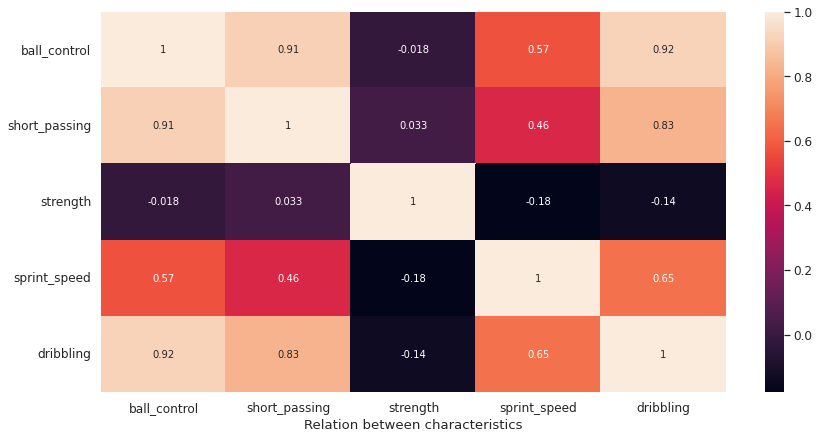

In [ ]:
# # your code here
# correlation_matrix = 
# display(correlation_matrix)
# sns.heatmap(...);

corrMatrix = DF_TRAIN[cols].corr(method='pearson')
display(corrMatrix)

plt.figure(figsize=(14,7))
sns.heatmap(data=corrMatrix, annot=True)
plt.xlabel("Relation between characteristics")
plt.show()

* what can you say about selected feature set using this correlation matrix?

In [ ]:
# dribbling - ball_control 
# dribbling - short_passing
# dribbling - sprint_speed

#### Let's build pairplots for features and target

* `plot_kws` parameter accepts dictionary of keyword arguments 
  that are passed to bivariate plotting function (`sns.scatterplot` in this case)


* we set size to 7 (using `s` parameter) to make points smaller and see patterns clearly.<br>
  you can compare this to running with not `plot_kws` passed.
  

* `alpha` parameter also helps to see data distribution clearly


* you can also experiment with `kind` parameter - refer to
  [seaborn.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)
  documentation for possible values.

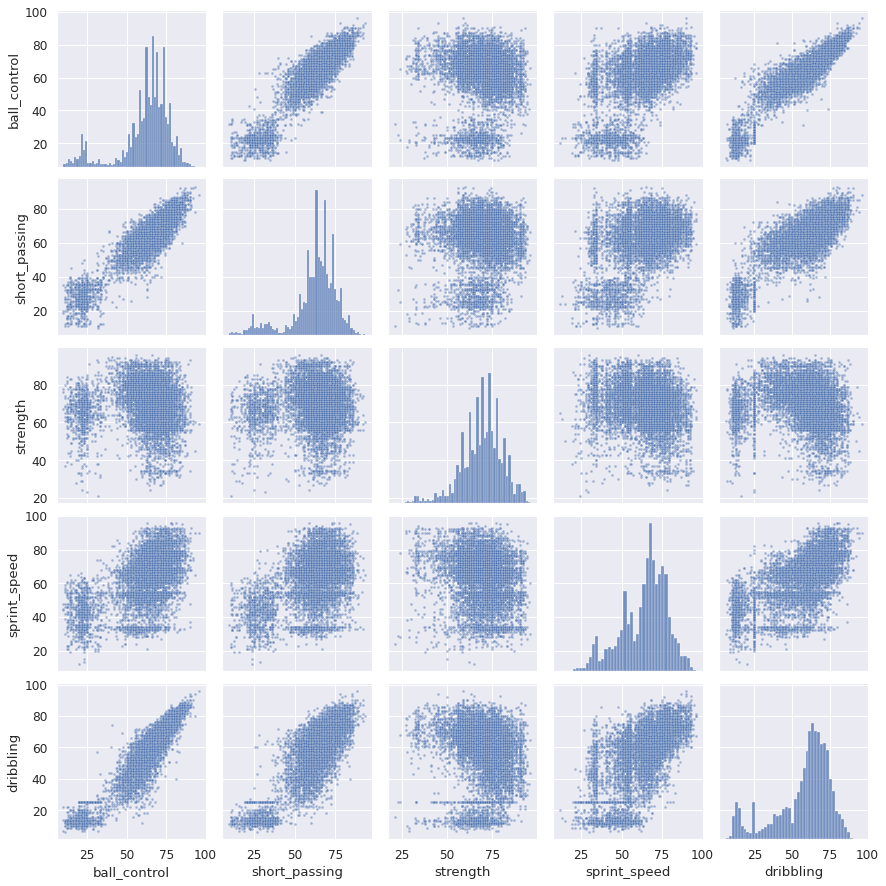

In [ ]:
sns.pairplot(DF_TRAIN[cols], plot_kws={'s': 7, 'alpha': 0.5});

* what can you say about these scatterplots? is there anything we can use later?

 ### Solve using `sklearn`

In [ ]:
model = LinearRegression(fit_intercept=True)
model.fit(x_train, y_train);

* explore fitted model parameters

In [ ]:
model_intercept = model.intercept_
model_coef = model.coef_
print(f'model_intercept: {model_intercept}')
print(f'model_coef: {model_coef}')

model_intercept: -4.6445559563494
model_coef: [ 0.98315573 -0.02118567 -0.1523868   0.19992096]


* how to interpret these model parameters?

* use fitted model to get predictions for test set

In [ ]:
model_preds = model.predict(x_test)
model_preds

array([74.27858566, 67.60427274, 68.35661846, ..., 38.99459602,
       60.2746915 , 52.45023415])

* explore model quality on test set.

In [ ]:
print('model metrics on test set')
metrics_test_2 = get_metrics(y_true=y_test, y_pred=model_preds)
metrics_test_2

model metrics on test set


mse     34.414528
mae      4.174687
mape     0.088877
r2       0.864137
dtype: float64

* Let's compare `metrics_test_2` against `metrics_test_1`

In [ ]:
# combine 2 series in 1 dataframe
metrics_comparison = metrics_test_1.to_frame('LR_1v').join(metrics_test_2.rename('LR_mv')).T
metrics_comparison

,mse,mae,mape,r2
LR_1v,123.543884,8.808577,0.168446,0.512268
LR_mv,34.414528,4.174687,0.088877,0.864137


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/__init__.py:71: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


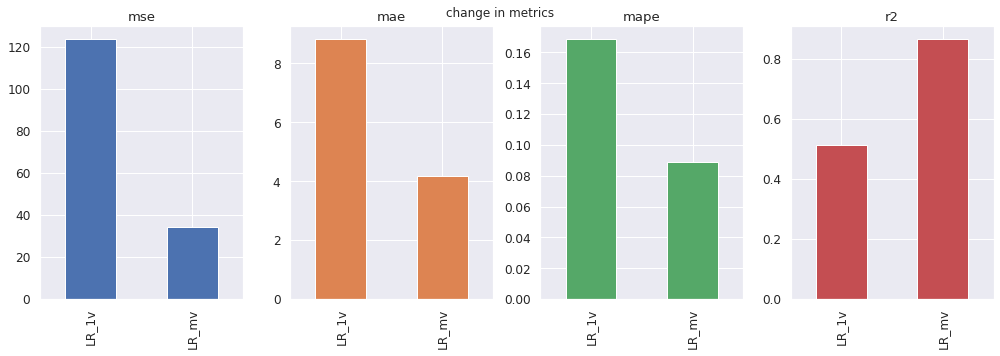

In [ ]:
fig, ax = plt.subplots(figsize=(14, 5))  # specify figure size
metrics_comparison.plot(
    kind='bar', layout=(1,4), subplots=True, 
    title='change in metrics', legend=False, ax=ax
);
fig.tight_layout();  # prettify subplots. read more in documentation if interested

* did our Linear regression model improve after we've added more features?

### **Task 9**. Implement Linear regression model with multiple variables yourself (5 points)

Okay, we've fitted Linear regression model using `sklearn` library. Now let's do the math ourselves!

### Prerequisites

For this task you will need to:
* have basic understanding of Linear algebra (operations with vectors and matrices)
* know how to perform matrix multiplication, transposition and inversion using `numpy` 
  (these functions can be found in NumPy documentation)
* carefully read the theory below and refer to wiki / textbooks / other sources if required

---

### Theory and notation

When we extend Linear regression model on case with $m$ variables we get the following formula:

* $ \hat{y}
= 1 \cdot w_0 + x_1 \cdot w_1 + x_2 \cdot w_2 + ... + x_m \cdot w_m
= \sum_{i=0}^{m} x_i w_i
$,

where:
* $x = (1, x_1, ..., x_m)$ is an _(m+1)_-element feature vector. 
    * $x_0 = 1$ is a special term introduced in the beginning of feature vector 
      to add intercept to Linear regression model
    * $x_i, i=\overline{1,m}$ is an _i_-th feature value.
* $w = (w_0, w_1, ..., w_m)$ is an _(m+1)_-element parameter vector
    * $w_0$ - the first value of parameter vector - is referred to as **intercept**
* $\hat{y}$ is a predicted value

----

The formula above is used to calculate predictions for 1 sample.
i.e. we predict 1 scalar $\hat{y}$ from 1 feature vector $x$.

If we have a dataset of $n$ samples $(x, y)$ - we get a system of linear equations:

$
\begin{cases}
 \hat{y}^{(0)} = \sum_{i=0}^{m} x_i^{(0)} w_i \\
 \hat{y}^{(1)} = \sum_{i=0}^{m} x_i^{(1)} w_i \\
 ... \\\
 \hat{y}^{(n-1)} = \sum_{i=0}^{m} x_i^{(n-1)} w_i
\end{cases}
$

Such system can be rewritten in a succinct matrix form (a way that we write equations in Linear algebra):

* $ \hat{y} = X \cdot w $

And the task of minimizing Residual sum of squares (RSS) now looks:
* $ RSS(w, x, y) = \|y - \hat{y}\|_2^2 = \|y - X \cdot w \|_2^2 \rightarrow min $

Here:
* $y = (y^{(0)}, y^{(1)}, ..., y^{(n-1)})$ now denotes a **vector of target values** we want to predict<br>
  $y^{(j)}$ is a target value for _j_-th sample in a dataset.
* $\hat{y} = (\hat{y}^{(0)}, ..., \hat{y}^{(n-1)})$ 
  now denotes a **vector of predictions** <br>
  $\hat{y}^{(j)}$ denotes a predicted value for _j_-th sample in a dataset
* $X$ is a **feature matrix** of shape $n \times (m+1)$. <br>
  _n_ rows correspond to _n_ data samples and _m+1_ columns correspond to _m+1_ features that describe each sample.
* $w = (w_0, w_1, ..., w_m)$ is still a **model parameter vector**
* $X \cdot w$ denotes a **matrix-by-vector** multiplication
* $\|\cdot\|_2$ denotes an $L_2$-norm and is basically a square root of sum of squares of vector elements:<br>
  $\|a\|_2 = \sqrt{a_0^2 + a_1^2 + ... + a_{n-1}^2}$ for an _n_-component vector _a_.
  Thus, RSS means the same as before:<br>
  $ RSS(w, x, y) = \|y - \hat{y}\|_2^2 = 
  (y^{(0)} - \hat{y}^{(0)})^2 + (y^{(1)} - \hat{y}^{(1)})^2 + ... + (y^{(n-1)} - \hat{y}^{(n-1)})^2 = 
  \sum_{j=0}^{n-1} (y^{(j)} - \hat{y}^{(j)})^2
  $

Note:
* we now use **superscripts** $\hat{y}^{(i)}$ instead of **subscripts** $\hat{y}_i$ as before
  to denote _i_-th sample in a dataset
* it is done to be able to refer both to sample index (denoted by superscript)
  and feature index (denoted by subscript) in a single equation. 
  
  Thus:
  * $x^{(j)} = (1, x^{(j)}_1, x^{(j)}_2, ..., x^{(j)}_{m})$  now denotes 
    _j_-th feature vector in a dataset with _m+1_ features
  * $x_i^{(j)}$ denotes an _i_-th feature value of _j_-th feature vector
  * 
  $X$ = \begin{bmatrix} 1 & x^{(0)}_1 & x^{(0)}_2 & ... & x^{(0)}_{m} \\
      1 & x^{(1)}_1 & x^{(1)}_2 & ... & x^{(1)}_{m} \\... \\1 & x^{(n-1)}_1 & 1 & x^{(n-1)}_2 & ... & x^{(n-1)}_{m}\\  \end{bmatrix}

    $ 
    is\ an\  n \times (m+1)$
    feature matrix.
    
    $X$
    can also be written as a column-vector of feature vectors:
    
  $X$ =\begin{bmatrix}x^{(0)} \\ x^{(1)} \\ ... \\ x^{(n-1)}\end{bmatrix} $

---

### Fit 

**<TL;DR\>** Enough notation! How can we fit this model?

By minimizin Residual sum of squares (RSS) for a Linear regression equation in a matrix form
we now get a **single** formula to find **all model parameters**!
* $ w = (X^T X)^{-1} X^T y $

Beautiful, isn't it? <br>
Recall, how we got individual formulas for $w_0, w_1$ in case of Linear regression with 1 predictor.<br>
Now we can find the whole parameter vector _w_ at once!

In the formula above:
* $X$ is an $n \times (m+1)$ dimensional feature matrix


* $X^T$ is a **transposed** feature matrix.<br>
  Transposition is a mathematical operation of "swapping" matrix dimensions.<br>
  So $X^T$ is an $(m+1) \times n$ dimensional matrix  


* $ (X^T X)^{-1} $ is the inverse matrix of $ X^T X $

Notes:
* Because of inversion operation performed on $X^T X$ matrix 
  there are difficulties in fitting Linear regression model in some cases.
  
  We will talk more on that later in the assignment.

---
    
If you want to learn more you can refer to 
[Linear least squares](https://en.wikipedia.org/wiki/Linear_least_squares)
wiki-page.

### Implementation

* implement `LRMatrixForm` class and `add_ones_column` function.<br>
  docstrings describe what each function/method should do - so read the docstrings.
  
  
* [what is a docstring?](https://www.python.org/dev/peps/pep-0257/#what-is-a-docstring)


Note:
* `LRMatrixForm` class must support 2 modes: **with** fitting intercept parameter and **without**.<br>
  The behavior is controlled by `fit_intercept` parameter passed to class constructor.

In [ ]:
from sklearn.exceptions import NotFittedError

In [ ]:
def add_ones_column(x):
    """ 
    Add column consisting of ones to the beginning of matrix `x`. 
    Used when fitting `LRMatrixForm` with `fit_intercept` param set to True.
    """
    # HINTS: 
    # * create a vector that consists of ones: (1, 1, ..., 1)
    # * then use either `np.column_stack` or `np.hstack` function to add this vector to a matrix
    
    # # your code here:
    a = np.ones(x.shape[0])
    # b = x.to_numpy()
    return np.column_stack((a, x))


class LRMatrixForm:
    """
    Class that encapsulates Linear regression model with multiplie variables.
    Calculations are performed using matrix formula.
    
    Use `fit()` method to fit the model on data.
    Use `predict()` method to calculate predictions when the model is fitted.
    """
    def __init__(self, fit_intercept: bool = True):
        """
        fit_intercept: 
        Whether to calculate the intercept for this model. 
        If set to False, no intercept will be used in calculations 
        (i.e. data is expected to be centered).
        """
        self.fit_intercept = fit_intercept
        self.w_ = None  # vector with all model parameters (intercept and weights)
    
    def fit(self, x_train: pd.DataFrame, y_train: pd.Series):
        X = x_train.to_numpy()  # convert pd.DataFrame to numpy matrix
        
        if self.fit_intercept is True:
            # when creating a model with intercept term we need to extend feature matrix
            # with a column consisting of ones (1, 1, ..., 1).
            X = add_ones_column(X)
            
        # # your code here to calculate model parameters:
        self.w_ = np.linalg.inv(np.transpose(X) @ X) @ np.transpose(X) @ y_train
        
    @property
    def coef_(self):
        """ Property that returns model parameters without the intercept term. """
        if self.w_ is None:
            raise NotFittedError()
        # # your code here:
        if self.fit_intercept is True:
            return self.w_[1:]

        return self.w_
    
    @property
    def intercept_(self):
        """ Property that returns intercept term from model parameters. """
        if self.fit_intercept is not True:
            return 0.0  # for compatibility with sklearn
        if self.w_ is None:
            raise NotFittedError()
        # # your code here:
        return self.w_[0]
    
    def predict(self, x_test: pd.DataFrame):
        """ Generate predictions using fitted model parameters. """
        if self.w_ is None:
            raise NotFittedError()
        
        X = x_test.to_numpy()  # convert pd.DataFrame to numpy matrix
        
        if self.fit_intercept is True:
            X = add_ones_column(X) 

        # # your code here to calculate predictions
        return pd.Series(X @ self.w_)

### Validate your implementation is identical to library version

In [ ]:
lr_matrix_form = LRMatrixForm(fit_intercept=True)
fit_and_evaluate(lr_matrix_form, x_train, y_train, x_test, y_test)

,mse,mae,mape,r2
train,27.281897,0.796917,0.022266,0.918070
test,5.564377,0.245363,0.005391,0.978033


In [ ]:
print(f'intercept: {lr_matrix_form.intercept_}')
print(f'coef: {lr_matrix_form.coef_}')

intercept: -4.64455595635049
coef: [ 0.98315573 -0.02118567 -0.1523868   0.19992096]


In [ ]:
assert np.allclose(model.predict(x_test), lr_matrix_form.predict(x_test))
assert round(model.intercept_, 9) == round(lr_matrix_form.intercept_, 9)
assert np.allclose(model.coef_, lr_matrix_form.coef_)

* let's take a look at difference between model predictions and target values:

In [ ]:
(model.predict(x_test) - y_test).describe()

count    2117.000000
mean       -0.541784
std         5.842698
min       -32.456911
25%        -3.686681
50%        -0.902539
75%         1.969204
max        26.396697
Name: dribbling, dtype: float64

### Now let's compare `sklearn` model and yours with `fit_intercept=False`

In [ ]:
model = LinearRegression(fit_intercept=False)
fit_and_evaluate(model, x_train, y_train, x_test, y_test)

,mse,mae,mape,r2
train,38.989429,4.547899,0.11681,0.882911
test,34.532981,4.226555,0.09001,0.863669


In [ ]:
lr_matrix_form = LRMatrixForm(fit_intercept=False)
fit_and_evaluate(lr_matrix_form, x_train, y_train, x_test, y_test)

,mse,mae,mape,r2
train,26.907938,0.792236,0.022172,0.919193
test,5.561844,0.245528,0.005380,0.978043


* Compare the metrics on a test set of a model fitted **with** intercept parameter 
  vs model fitted **without** intercept.
* Which model has a better performance? Can you explain why?

In [ ]:
print(f'intercept: {lr_matrix_form.intercept_}')
print(f'coef: {lr_matrix_form.coef_}')

intercept: 0.0
coef: [ 0.99584895 -0.04100747 -0.19052441  0.17657904]


In [ ]:
print(model.coef_)
print(lr_matrix_form.coef_)

[ 0.99584895 -0.04100747 -0.19052441  0.17657904]
[ 0.99584895 -0.04100747 -0.19052441  0.17657904]


In [ ]:
assert np.allclose(model.predict(x_test), lr_matrix_form.predict(x_test))
assert round(model.intercept_, 9) == round(lr_matrix_form.intercept_, 9)
assert np.allclose(model.coef_, lr_matrix_form.coef_)

* let's take a look at difference between model predictions and target values again:

In [ ]:
(model.predict(x_test) - y_test).describe()

count    2117.000000
mean       -0.373434
std         5.865985
min       -31.693636
25%        -3.662235
50%        -0.714676
75%         2.293013
max        26.277456
Name: dribbling, dtype: float64

* compare this to the same statistics obtained with model fitted **with intercept**
* notice how the _mean_ value of difference changed

## Limitations of Linear regression

Recall the formula to find Linear regression parameters in case of multiple variables:
* $ w = (X^T X)^{-1} X^T y $

As noted above, there might be difficulties with fitting Linear regression model
because of inverting $X^T X$ matrix.

Not every matrix can be inverted.

An example of such case is when 2 or more features have strong linear relationship between them.<br>
It means that one of variables can be **linearly predicted from the others with a substantial degree of accuracy**.<br>
Such situation is named **collinearitry** (in case of 2 related variables)
or **multicollinearity** (>2 related features).<br>

Collinearity is associated with high value of correlation coefficient between 2 related features.

You can refer to [multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity) 
wiki page to read more.

The intuition why multicollinearity is bad is that Linear Regression tries to capture 
a contribution of each individual feature to target independently of other features.
This is not possible with the data that has collinear features, 
as change in one such variable is always associated with change in other/others.

There are a whole bunch of really interesting thoughts that can help you 
to capture the intuition behind the concept of multicollinearity.<br>
You can find some of them 
[here](https://stats.stackexchange.com/questions/1149/is-there-an-intuitive-explanation-why-multicollinearity-is-a-problem-in-linear-r).

### Collinearity

* Let's construct and add a new feature to our dataset that is going to be _collinear_ with another one:

In [ ]:
# select features as usual
target = 'dribbling'
features = ['ball_control', 'short_passing', 'strength', 'sprint_speed']
x_train, y_train, x_test, y_test = get_train_test_data(features, target)

In [ ]:
def add_collinear_column(_df: pd.DataFrame, orig_col: str, new_col: str):    
    """ 
    Construct new column as a linear transform of another one + tiny noise.
    y = f(x) = a1 * x + a2 + noise.
    
    Alternatively, we could apply no linear transform at all (set a1=1, a2=0)
    And only add some noise to existing column. Results would be the same.
    """
    # linear transform
    _df[new_col] = 2 * _df[orig_col] + 3
    # add tiny normal noise
    _df[new_col] += np.random.normal(loc=0, scale=0.0001, size=_df.shape[0])

orig_col = 'sprint_speed'
new_col = 'sprint_speed_2'
add_collinear_column(x_train, orig_col, new_col)
add_collinear_column(x_test, orig_col, new_col)
features.append(new_col)

In [ ]:
corr_coef = np.corrcoef(x_train[orig_col], x_train[new_col])[0, 1]
print(f'correlation between {orig_col} and {new_col}: {corr_coef}')

correlation between sprint_speed and sprint_speed_2: 0.9999999999937029


* As expected, correlation coefficient between collinear features 
  (`sprint_speed` and `sprint_speed_2`) is close to 1.<br>
  Thus they are highly correlated.

In [ ]:
# visualize sample of train data
check = x_train.sample(5).copy()
# add helper column to see how much noise was added
check['sprint_speed_2_wo_noise'] = 2 * check['sprint_speed'] + 3
check

,ball_control,short_passing,strength,sprint_speed,sprint_speed_2,sprint_speed_2_wo_noise
166216,66.0,70.0,75.0,69.0,141.000000,141.0
150885,15.0,23.0,62.0,49.0,101.000125,101.0
61343,65.0,67.0,85.0,52.0,107.000062,107.0
152953,42.0,42.0,75.0,50.0,103.000121,103.0
11719,62.0,60.0,74.0,68.0,138.999913,139.0


### let's fit a Linear Regression model on this feature set:

In [ ]:
model = LinearRegression(fit_intercept=True)
fit_and_evaluate(model, x_train, y_train, x_test, y_test)

,mse,mae,mape,r2
train,38.706037,4.510980,0.115492,0.883762
test,34.425385,4.174998,0.088873,0.864094


* Both train and test metrics look reasonable
* Now let's explore model params:

In [ ]:
print(f'intercept: {model.intercept_}')
print(f'coef: {model.coef_.tolist()}')

intercept: 1957.8300240907893
coef: [0.9832617448503264, -0.02136590289562592, -0.15240685788911387, 1308.5091462690664, -654.1546476827341]


* Weights that correspond to `sprint_speed` and `sprint_speed_2` columns should have gone insanely high!


* That is not ok. Large weights and weights instability are the sign of 
    [**overfitting**](https://en.wikipedia.org/wiki/Overfitting).

    According to the definition, overfitting is:<br>
    "_the production of an analysis that corresponds too closely 
    or exactly to a particular set of data,<br>
    and may therefore fail to fit additional data 
    or predict future observations reliably_".
    
    
* But what does that mean? Let's try to generate predictions with our model.

### generate predictions using our fitted model

In [ ]:
check = x_test.head(2).copy()
check[target] = y_test.head(2)
check['preds'] = model.predict(check[features])
check

,ball_control,short_passing,strength,sprint_speed,sprint_speed_2,dribbling,preds
57104,72.0,62.0,60.0,93.0,188.999882,77.0,74.355179
103000,67.0,61.0,52.0,78.0,158.999980,69.0,67.617467


In [ ]:
get_metrics(y_true=check[target], y_pred=check['preds'])

mse     4.453237
mae     2.013677
mape    0.027193
r2      0.721673
dtype: float64

* predictions look good, right? 

### but what if we change `sprint_speed` values a bit? let's add some small `delta`

In [ ]:
delta = 1  # some small value
check['sprint_speed'] += delta
check['preds_2'] = model.predict(check[features])
check

,ball_control,short_passing,strength,sprint_speed,sprint_speed_2,dribbling,preds,preds_2
57104,72.0,62.0,60.0,94.0,188.999882,77.0,74.355179,1382.864325
103000,67.0,61.0,52.0,79.0,158.999980,69.0,67.617467,1376.126613


In [ ]:
get_metrics(y_true=check[target], y_pred=check['preds_2'])

mse     1.706931e+06
mae     1.306495e+03
mape    1.795157e+01
r2     -1.066822e+05
dtype: float64

* Wow, new predictions doesn't look even close to the target!<br>
  Our model doesn't look like a good model anymore.
  

* That is exactly what overfitting is. <br>
  **We fail to obtain reasonable predictions when we apply our model on new data**.

### One might notice that we have changed only 1 of 2 collinear features
* Indeed, giant model weights that correspond to these 2 features, should cancel each one out<br>
  if relation between feature values stays the same.  

* Let's check this out.<br>
  We have performed following transform:<br>
  `sprint_speed_changed = sprint_speed + delta`<br>
  

* How should we change `sprint_speed_2` to match the same data distribution from train data?<br>
  
  Let's calculate (we will ignore the noise added):  
  `sprint_speed_2_changed - sprint_speed_2 = f(sprint_speed_changed) - f(sprint_speed) =`<br>
  `= a1 * sprint_speed_changed + a2 - (a1 * sprint_speed + a2) = a1 * delta`

In [ ]:
# here we change the second of collinear features 
# using the same coefficient 
# that was used in linear transform in `add_collinear_column()` function.
# we don't need to add intercept coefficient as it cancels it out (you can do the math yourself).
check['sprint_speed_2'] += 2 * delta
check['preds_3'] = model.predict(check[features])
check

,ball_control,short_passing,strength,sprint_speed,sprint_speed_2,dribbling,preds,preds_2,preds_3
57104,72.0,62.0,60.0,94.0,190.999882,77.0,74.355179,1382.864325,74.555030
103000,67.0,61.0,52.0,79.0,160.999980,69.0,67.617467,1376.126613,67.817318


* In the last example we see that new predictions (`preds_3`) now look similar to the first ones <br>
  (`preds` - calculated before changing `sprint_speed` value)


* So, if values of collinear features change accordingly - we are safe, right? <br>
  How do your think, can we always rely on this assumtion?

### What just happened

* The answer to the question above is: **no, we can't**.
  
  
* Yes, we have checked that if collinear features values are changed accordingly 
  (i.e. their **initial relation is preserved**), <br>
  model predictions look reasonable and accurate.
  
  But this will not always be the case on the real data.
  
  We can't be sure that the data 
  that we apply our fitted model on (`x_test`, for example)<br>
  preserves **exactly the same data distribution** as the data that model was trained on (`x_train`).
  
  

**Why this happened?**

* When feature matrix contains collinear or multicollinear features (the problem of **multicollinearity**),
  inversion of such a matrix is numerically unstable.<br>
  This leads to large values and imprecise estimates of model parameters.

**How to detect multicollinearity**
* You should monitor your model weights. For example using $L_2$ norm:<br>
  $ L_2(w) = \|w\|_2 = \sqrt{w_1^2 + w_2^2 + ... + w_n^2} = \sqrt{\sum_{i=1}^{n} w_i^2} $<br>
  If any of model weights are huge - $L_2$ norm will also have large value.
  
  
* Monitor model performance on validation data. 
  If the metrics are poor and prediction look huge,<br>
  you should check if collinear features are present in train data.

**How to fix the issue**

* For each set of collinear features, keep only 1 of them and remove the rest.<br>
  The best regression models are those in which the predictor variables each correlate highly 
  with the target variable,<br>
  but correlate at most only minimally with each other.
  

* Combine collinear features into new ones

  
* Use regularization (will be covered later in the course).

### **Task 10**. Implement function to calculate $L_2$-norm. (1 point)
* Use formula above to implement $L_2$ norm

In [ ]:
import math
def l2_norm(arr: Iterable):
    # your code here
    return math.sqrt(sum(i ** 2 for i in arr))
    raise NotImplementedError()

### Calculate $L_2$-norm value for current model
* you should get high value that represents large values of some model parameters

In [ ]:
print(l2_norm(model.coef_))

1462.913353361276


### Multicollinearity
  
* It's important to notice that in case of multicollinearity,
  correlation coefficient between each pair of related variables
  could be **not so high**.
  
  So **it may be hard to find multicollinear features in your data**.
  

* Let's visualize it in practice.

  We will build a new feature that has a strong linear relationship with 2 other features:
  $x_1 = a_0 + a_2 x_2 + a_3 x_3 + noise$

  We want to show that Linear regression model will still suffer from multicollinearity,<br>
  but correlation coefficients betweent each pair of multicollinear features will be **less close to 1**
  than it was in case of collinearity.

In [ ]:
target = 'dribbling'
features = ['ball_control', 'short_passing', 'strength', 'sprint_speed']
x_train, y_train, x_test, y_test = get_train_test_data(features, target)

def add_collinear_column(_df: pd.DataFrame, col1: str, col2: str, new_col: str):    
    _df[new_col] = _df[col1] + _df[col2] + 5
    _df[new_col] += np.random.normal(loc=0, scale=0.0001, size=_df.shape[0])

add_collinear_column(x_train, col1='sprint_speed', col2='strength', new_col='foo')
add_collinear_column(x_test, col1='sprint_speed', col2='strength', new_col='foo')
features.append(new_col)

model = LinearRegression(fit_intercept=True)
m = fit_and_evaluate(model, x_train, y_train, x_test, y_test)
display(m)
print(f'intercept: {model.intercept_}')
print(f'coef: {model.coef_.tolist()}')

,mse,mae,mape,r2
train,38.709358,4.511114,0.115481,0.883752
test,34.430877,4.174891,0.088870,0.864072


intercept: 1605.6685762879833
coef: [0.9830985459153664, -0.021169924988458197, 321.9095119071791, 322.261835933077, -322.06191371742506]


* As before, model parameters for multicollinear features should be large

* Let's calculate $L_2$-norm value - it should also be large

In [ ]:
l2_norm(model.coef_)

557.8559562768176

#### Task 11. Visualize correlation matrix for `x_train`  (1 point)
* Build annotated heatmap (use `annot` param to add values to plot, select diverging `cmap` and center it at 0)
* You should see that `foo` feature is correlated with ones it was created from,<br>
  but each of these correlation coefficients **is not so close to 1**

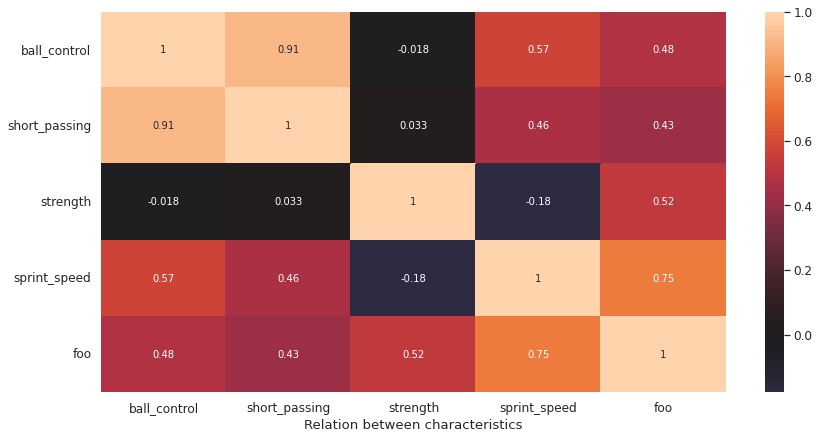

In [ ]:
# your code here
corrMatrix = x_train.corr(method='pearson')

plt.figure(figsize=(14,7))
sns.heatmap(data=corrMatrix, cmap='icefire', center=0, annot=True)
plt.xlabel("Relation between characteristics")
plt.show()
# sprint_speed, strength

In [ ]:
# foo-sprint_spees
# ball_controll - short_passing
# ball-controll - sprint_speed   ????
# foo-strength  ????



### Regularization

* The concept of regularization (that was mentioned above) is simple.

  We modify Loss function (RSS in case of Linear regression) in such a way<br>
  to penalize for large values of model parameters.
  
  
* $L_2$ regularization, also named as 
  [Tikhonov regularization](https://en.wikipedia.org/wiki/Tikhonov_regularization), 
  adds $L_2$ term to loss function:

  $L(w,x,y) = RSS(w,y) + \alpha L_2(w) = \|y - \hat{y}\|_2^2 + \alpha \|w\|_2^2 
  = \|y - X \cdot w \|_2^2 + \alpha \|w\|_2^2$
  
  parameter $ \alpha \ge 0 $ controls the ammount of regularization applied
  

* Linear regression implemented with $L_2$ regularization is named a **Ridge regression**.


* Ridge regression is implemented in `Ridge` class in `sklearn` library

---

Let's see how applying regularization changes our model.

In [ ]:
from sklearn.linear_model import Ridge

* at first fit `Ridge` without any regularization to ensure we get similar results 
  to using `LinearRegression`

In [ ]:
# `solver` parameters determines the algorithm used to solve regression task.
# we fix it to be `svd` to achieve desired results.
model_r = Ridge(alpha=0, fit_intercept=True, solver='svd')
fit_and_evaluate(model_r, x_train, y_train, x_test, y_test)

,mse,mae,mape,r2
train,38.709358,4.511114,0.115481,0.883752
test,34.430877,4.174891,0.088870,0.864072


In [ ]:
print(f'intercept: {model_r.intercept_}')
print(f'coef: {model_r.coef_.tolist()}')
print(f'l2 norm: {l2_norm(model_r.coef_)}')

intercept: 1605.6685762880124
coef: [0.9830985459153666, -0.021169924988390404, 321.9095119071816, 322.26183593307957, -322.0619137174277]
l2 norm: 557.855956276822


* some model parameters should be large, as well as the $L_2$-norm value
* now, let's add some regularization

In [ ]:
model_r = Ridge(alpha=0.01, fit_intercept=True, solver='svd')
fit_and_evaluate(model_r, x_train, y_train, x_test, y_test)

,mse,mae,mape,r2
train,38.710373,4.511156,0.115481,0.883749
test,34.414570,4.174687,0.088877,0.864137


In [ ]:
print(f'intercept: {model_r.intercept_}')
print(f'coef: {model_r.coef_.tolist()}')
print(f'l2 norm: {l2_norm(model_r.coef_)}')

intercept: -0.2673381224595417
coef: [0.9831555440122776, -0.02118559939002722, 0.7230546196935751, 1.0753624305480622, -0.8754414729806388]
l2 norm: 1.8473369389617473


* notice how parameter values changed
* also notice how $L_2$-norm values decreased

## Task 12. Putting all together. (up to 10 points)

In the final task we'll try to recap all that we have learnt so far.

Your task is to build a Linear regression model with multiple variables to predict `agility` variable.<br>
Only `LinearRegression` class is allowed to be used for modeling.<br>

Steps you need to follow:

* Make a new train/test split with new proportion: 70% on train and 30% on test data **(1 point)**


* Fit a model **(up to 6 points)**
    
    * Choose >= 10 features from training set as initial set of features
      Explain your choice. **(1 point)**
      
    * Visualize correlation matrix for selected features **(1 point)**
    
    * Analyze if collinear/multicollinear features are present in your feature set.<br>
      Process collinear/multicollinear features if they are present:<br>
      remove redundant features, combine features into new ones, etc **(up to 3 points)**
     
    * Fit the model and calculate metrics on train and test sets<br>
      **(1 point max. -0.25 points per each metric that was not implemented in the beginning of the assignment)**
    

* Analyze fitted model performance **(up to 2 points)**:
    * Print fitted model parameters and calculate their $L_2$-norm value **(1 point)**
    * Make conclusion whether your model overfitted or not. Provide your arguments. **(1 point)**


* Write a short report about the work done **(1 point)**<br>
  Can you find a logical explanation for high correlation of some of your features?<br>
  Are you satisfied with the quality of predictions?<br>
  How could you pottentially improve the model?<br>
  Any other thoughts.


**Penalties:**
- **0 points are assigned for the whole task** if used a model different from:
    - `sklearn.linear_model.LinearRegression`
    - or `LRMatrixForm`

Давайте посмотрим на связь характеристик. Построим корреляционную матрицу для всех признаков.

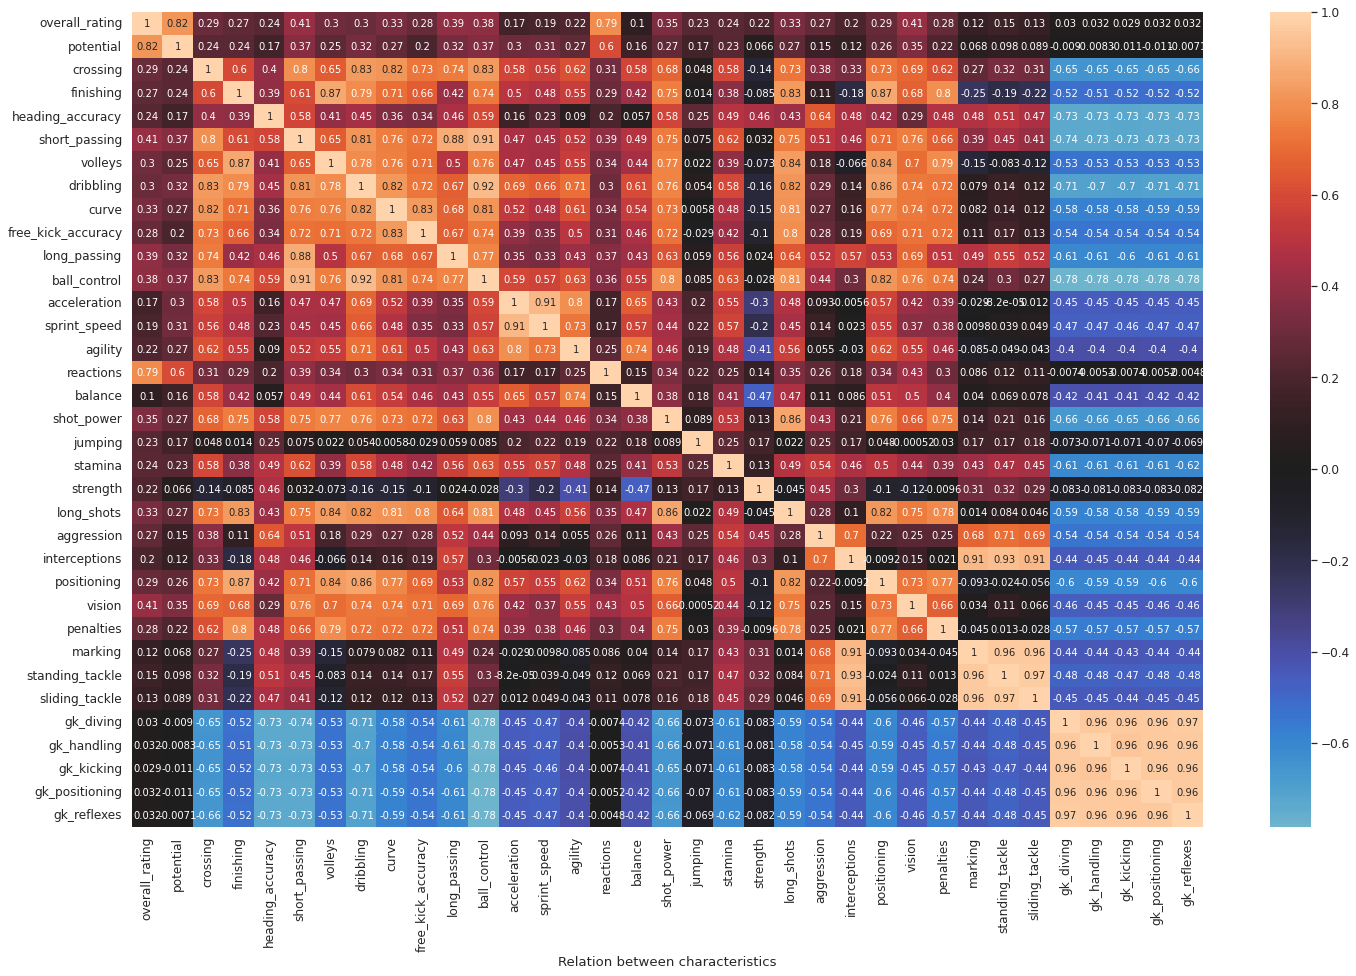

In [ ]:
corrMatrix = df.corr(method='pearson')

plt.figure(figsize=(24,15))
sns.heatmap(data=corrMatrix, cmap='icefire', center=0, annot=True)
plt.xlabel("Relation between characteristics")
plt.show()

In [ ]:
# отбираем признаки на основе матрицы корреляции
corrMatrix = df.corr(method='pearson')
posible_features = corrMatrix['agility'].sort_values(ascending=False)
posible_features = posible_features.loc[(abs(posible_features.values) >= 0.4) & (posible_features.index != 'agility')]
features = posible_features.index.tolist()
target = ['agility']

In [ ]:
# Количество отобранных признаков
print("Количество отобранных признаков : ", len(features))


Количество отобранных признаков :  22


Руководствуясь логикой, матрицей корреляции выбираем признаки в которых нужна ловкость и у которых коэффициент корреляции >= 0.5  (**agility**). Согласно шкале Чеддока мы отобрали средние, высокие и очень высокие зависимости. 
По шкале Чеддока: 

*   от 0 до 0,3    очень слабая
*   от 0,3 до 0,5    слабая
*   признаки от 0, 5 до 0,7    средняя
*   от 0,7 до 0, 9    высокая 
*   от 0,9 до 1    очень высокая


In [ ]:
features

['acceleration',
 'balance',
 'sprint_speed',
 'dribbling',
 'ball_control',
 'positioning',
 'crossing',
 'curve',
 'long_shots',
 'finishing',
 'vision',
 'volleys',
 'short_passing',
 'free_kick_accuracy',
 'stamina',
 'shot_power',
 'penalties',
 'long_passing',
 'gk_positioning',
 'gk_diving',
 'gk_reflexes',
 'strength']

В списке отобранных признаков, в каждом в той или иной степени присутствует ловкость:


*   *acceleration* - ускорение
*   *balance* - балланс/рановесие
*   sprint_speed - спринтерская скорость/скорость рывков
*   dribbling - ведение мяча
*   ball_control - владение мячом
*   positioning - позициониование на поле
*   crossing - навесы
*   curve - подкрутка
*   long_shots - дальние удары
*   finishing - Точность удара
*   vision - кругозор
*   volleys - удары верхом
*   short_passing - короткий пас
*   free_kick_accuracy - точность штрафного удара
*   stamina - выносливость
*   shot_power - ила удара
*   penalties - пенальти
*   long_passing - длинный пас
*   gk_positioning - позиция вратаря
*   gk_diving - нырок
*   gk_reflexes - рефлексы
*   strength - сила



Разбиваем датасет на тестовый и тренировочный в пропорции 70% на 30%

In [ ]:
print(df.shape)
ix_split = int(0.7 * df.shape[0])
DF_TRAIN = df[features + target].iloc[:ix_split].copy()
DF_TEST = df[features + target].iloc[ix_split:].copy()
print(DF_TRAIN.shape, DF_TEST.shape)

(10582, 35)
(7407, 23) (3175, 23)


In [ ]:
x_train, y_train, x_test, y_test = get_train_test_data(features, target)

Посмотрим на связь признаков между собой.

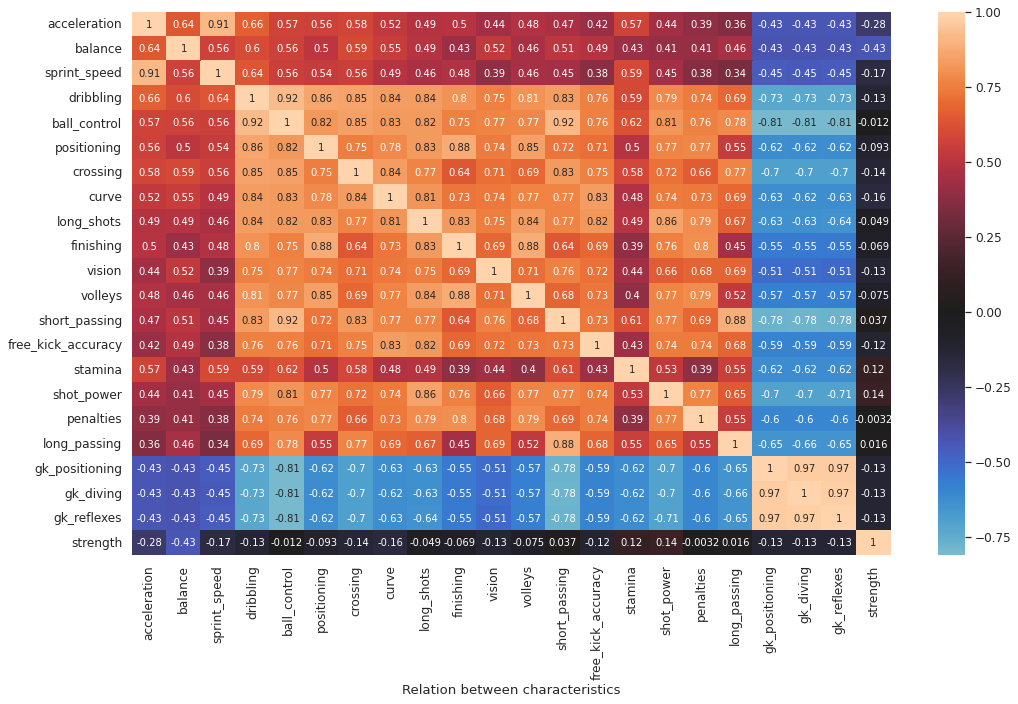

In [ ]:
corrMatrix = x_train.corr(method='pearson')

plt.figure(figsize=(17,10))
sns.heatmap(data=corrMatrix, cmap='icefire', center=0, annot=True)
plt.xlabel("Relation between characteristics")
plt.show()

Видно, что есть достаточно сильно связанные признаки. Например dribbling и ball_controll имею коэффициент корреляции 0,92.
Построим нашу модель на основе этих признаков ничего не меняя.

Модель c fit_intercept=False обладает следующими метриками:

In [ ]:
model = LinearRegression(fit_intercept=False)
fit_and_evaluate(model, x_train, y_train, x_test, y_test)

,mse,mae,mape,r2
train,44.997598,5.081042,0.092199,0.764043
test,40.204927,4.834259,0.084428,0.781895


Модель c fit_intercept=True обладает следующими метриками:

In [ ]:
model_f = LinearRegression(fit_intercept=True)
fit_and_evaluate(model_f, x_train, y_train, x_test, y_test)

,mse,mae,mape,r2
train,44.423525,5.047127,0.092205,0.767054
test,41.377072,4.872481,0.086023,0.775537


Модель с fit_intercept=False обладает большим r2 на тестовой выборке, и меньшим MSE, MAE, MAPE. Видимо эта модель лучше объясняет данные чем fit_intercept=True

Получаем следующие веса:

In [ ]:
from pprint import pprint 

print('Модель c fit_intercept=False:\n')
print(f'intercept: {model.intercept_}')
pprint(f'coef: {model.coef_.squeeze().tolist()}')
print(f'l2 norm: {l2_norm(model.coef_.squeeze())} \n')

print('Модель c fit_intercept=True:\n')
print(f'intercept: {model_f.intercept_}')
pprint(f'coef: {model_f.coef_.squeeze().tolist()}')
print(f'l2 norm: {l2_norm(model_f.coef_.squeeze())}')

Модель c fit_intercept=False:

intercept: 0.0
('coef: [0.331487865696211, 0.30153598184030594, 0.09280380196643599, '
 '0.1425982490923788, 0.0661463471789263, 0.017103307071912856, '
 '-0.016664835124526996, 0.044094439411617205, -0.023248845591711653, '
 '0.02096512772022369, 0.0354212849324974, 0.019163237044917823, '
 '0.005597142509819828, 0.020591464334779024, 0.0680942893534381, '
 '-0.027002490554305033, -0.012861504456997049, -0.001318146218004912, '
 '0.05172935649016788, 0.07423668779407552, 0.048755282958880104, '
 '-0.08532257592283586]')
l2 norm: 0.5129125574377176 

Модель c fit_intercept=True:

intercept: [11.34657405]
('coef: [0.3226225709459255, 0.26522660120670094, 0.0863580668241179, '
 '0.15158226210757583, 0.03341020508329103, 0.021196269410640334, '
 '-0.018190564830097754, 0.04520537001696689, -0.01286673104970726, '
 '0.018558601535452683, 0.0417163549600217, 0.021715509588259924, '
 '-0.019089865531225075, 0.014890982252149708, 0.06497869532718735, '
 '-0.0298

Модель без свободного члена дает большую L2 норму и r2, но все остальные метрики меньше, чем у модели со свободным членом на тестовой выбоке.

Модель c fit_intercept=False:

In [ ]:
(model.predict(x_test) - y_test).describe()

,agility
count,3175.000000
mean,0.728274
std,6.299765
min,-25.741330
25%,-3.381126
50%,0.359613
75%,4.409647
max,39.524811


Модель c fit_intercept=True:

In [ ]:
(model_f.predict(x_test) - y_test).describe()

,agility
count,3175.000000
mean,1.046618
std,6.347783
min,-26.778370
25%,-3.051739
50%,0.496139
75%,4.688956
max,40.051146


У модели со свободным членом чуть меньше дисперсия, да и все остальные параметры.

Расчитаем для наших признаков VIF (фактор инфляции дисперсии):


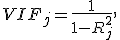

Так как был запрет только на LinearRegression для моделирования, то для расчета VIF воспользуемся библиотекой statsmodels

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
def vif_calculate(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    
    vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                            for i in range(len(df.columns))]
    
    return vif_data

Объеденим все 3 признака относящиеся к вратарю и удалим изначальные 3 признака. Выведем VIF для наших признаков.

In [ ]:
x_train['gk'] = x_train['gk_reflexes']+x_train['gk_diving']+x_train['gk_positioning']
x_test['gk'] = x_test['gk_reflexes']+x_test['gk_diving']+x_test['gk_positioning']
x_train.drop(columns=['gk_reflexes', 'gk_diving', 'gk_positioning'], inplace=True)
x_test.drop(columns=['gk_reflexes', 'gk_diving', 'gk_positioning'], inplace=True)

In [ ]:
print(vif_calculate(x_train).sort_values(by=['VIF'],ascending=False))

               feature         VIF
4         ball_control  263.456987
12       short_passing  237.740949
0         acceleration  145.262270
3            dribbling  132.665533
2         sprint_speed  132.135262
17        long_passing   99.245703
15          shot_power   80.453351
8           long_shots   67.655370
10              vision   61.163128
6             crossing   59.979223
5          positioning   58.252808
9            finishing   54.592596
7                curve   51.984268
14             stamina   46.552951
11             volleys   45.915345
18            strength   44.934345
1              balance   44.762772
16           penalties   44.495970
13  free_kick_accuracy   37.064667
19                  gk    4.376658


7 значений VIF сильно отличаются от остальных. Long_shot добавили в этот список потому что он коррелирует с shot_power, для объединения с ним.

In [ ]:
multycol = ['ball_control', 'short_passing', 'acceleration', 'sprint_speed', 'dribbling', 'long_passing', 'shot_power', 'long_shots']
corrMatrix = x_train.corr(method='pearson')
corrMatrix[multycol]

,ball_control,short_passing,acceleration,sprint_speed,dribbling,long_passing,shot_power,long_shots
acceleration,0.572541,0.467215,1.000000,0.909259,0.664284,0.358626,0.439488,0.488858
balance,0.562241,0.510994,0.640790,0.562897,0.604256,0.459528,0.405977,0.491106
sprint_speed,0.557584,0.454376,0.909259,1.000000,0.638063,0.341081,0.448712,0.464166
dribbling,0.924042,0.831344,0.664284,0.638063,1.000000,0.690403,0.785557,0.836750
ball_control,1.000000,0.916338,0.572541,0.557584,0.924042,0.782382,0.814804,0.824402
positioning,0.821698,0.724469,0.562700,0.542224,0.863945,0.546752,0.771061,0.826776
crossing,0.848766,0.826582,0.575986,0.557338,0.852507,0.767481,0.720617,0.766794
curve,0.827830,0.772906,0.524985,0.491898,0.842521,0.690682,0.739255,0.814568
long_shots,0.824402,0.771061,0.488858,0.464166,0.836750,0.665813,0.858237,1.000000
finishing,0.753322,0.641602,0.495397,0.476282,0.803911,0.451538,0.755338,0.827780


Объеденим признаки с самой высокой корреляцией ball_control, dribbling в один short_passing, long_passing в другой, а также acceleration и sprint_speed в третий, shot_power и long_shots в четвертый. И удалим признаки от которых они образованы.

In [ ]:
x_train_combine = x_train.copy()

x_train_combine['ball_drib'] = x_train_combine['ball_control'] + x_train_combine['dribbling']
x_train_combine['pass_pass'] = x_train_combine['long_passing'] + x_train_combine['short_passing']
x_train_combine['accel_speed'] = x_train_combine['acceleration'] + x_train_combine['sprint_speed']
x_train_combine['long_power'] = x_train_combine['shot_power'] + x_train_combine['long_shots']
x_train_combine.drop(columns = multycol, inplace=True)



In [ ]:
x_test_combine = x_test.copy()

x_test_combine['ball_drib'] = x_test_combine['ball_control'] + x_test_combine['dribbling']
x_test_combine['pass_pass'] = x_test_combine['long_passing'] + x_test_combine['short_passing']
x_test_combine['accel_speed'] = x_test_combine['acceleration'] + x_test_combine['sprint_speed']
x_test_combine['long_power'] = x_test_combine['shot_power'] + x_test_combine['long_shots']
x_test_combine.drop(columns = multycol, inplace=True)


Считаем VIF для новых признаков.

In [ ]:
print(vif_calculate(x_train_combine))

               feature         VIF
0              balance   43.355699
1          positioning   57.641176
2             crossing   58.941135
3                curve   51.826558
4            finishing   53.440121
5               vision   60.299623
6              volleys   45.744544
7   free_kick_accuracy   36.428698
8              stamina   46.526645
9            penalties   43.509233
10            strength   34.504779
11                  gk    4.084661
12           ball_drib  198.961198
13           pass_pass  118.222829
14         accel_speed   57.498717
15          long_power   88.693519


От остальных сильно отличается только ball_drib, pass_pass и long_power. Строим модель с fit_intercept=True и False и смотрим метрики.

Модель c fit_intercept=True:

In [ ]:
model_new_feat_f = LinearRegression(fit_intercept=True)
fit_and_evaluate(model_new_feat_f, x_train_combine, y_train, x_test_combine, y_test)

,mse,mae,mape,r2
train,45.027586,5.089709,0.092943,0.763886
test,41.198589,4.871000,0.085799,0.776505


Модель c fit_intercept=False:

In [ ]:
model_new_feat = LinearRegression(fit_intercept=False)
fit_and_evaluate(model_new_feat, x_train_combine, y_train, x_test_combine, y_test)

,mse,mae,mape,r2
train,45.531302,5.117950,0.092861,0.761245
test,40.264111,4.842298,0.084475,0.781574


In [ ]:
print(f'intercept: {model_new_feat_f.intercept_}')
pprint(f'coef: {model_new_feat_f.coef_.squeeze().tolist()}')
print(f'l2 norm: {l2_norm(model_new_feat_f.coef_.squeeze())}')

intercept: [10.39499019]
('coef: [0.2755836683998838, 0.022107843886256917, -0.017013960763733543, '
 '0.04655908139978787, 0.022550492218459322, 0.03875991808526469, '
 '0.020826553613930626, 0.019933869966548643, 0.06598356551687906, '
 '-0.02458080762635103, -0.16465396833593432, 0.04552682792762735, '
 '0.10544126420402766, -0.015345865179436452, 0.202927486308343, '
 '-0.02160820468025855]')
l2 norm: 0.41094501065717887


In [ ]:
print(f'intercept: {model_new_feat.intercept_}')
pprint(f'coef: {model_new_feat.coef_.squeeze().tolist()}')
print(f'l2 norm: {l2_norm(model_new_feat.coef_.squeeze())}')

intercept: 0.0
('coef: [0.3103870654472631, 0.018518394977956876, -0.017939197931806688, '
 '0.04492580047977335, 0.023551896028679953, 0.03440203879554364, '
 '0.01844994616089716, 0.02352833386175636, 0.06878864946323988, '
 '-0.01571341890671492, -0.10264701606915536, 0.06123891823074955, '
 '0.11507659153014776, -0.00427483435991835, 0.2096267946557635, '
 '-0.025476607287184497]')
l2 norm: 0.42281689930086613


Без свободного члена L2 norm и r2 дает более высокое значение, но MSE, MAE, MAPE немного меньше.

Выбросим признак с самым высоким значением VIF, посмтроим модель и посмотрим метрики.

In [ ]:
print(vif_calculate(x_train_combine).sort_values(by=['VIF'], ascending=False))

               feature         VIF
12           ball_drib  198.961198
13           pass_pass  118.222829
15          long_power   88.693519
5               vision   60.299623
2             crossing   58.941135
1          positioning   57.641176
14         accel_speed   57.498717
4            finishing   53.440121
3                curve   51.826558
8              stamina   46.526645
6              volleys   45.744544
9            penalties   43.509233
0              balance   43.355699
7   free_kick_accuracy   36.428698
10            strength   34.504779
11                  gk    4.084661


In [ ]:
corrMatrix_new_feat = x_train_combine.corr(method='pearson')
corrMatrix_new_feat

,balance,positioning,crossing,curve,finishing,vision,volleys,free_kick_accuracy,stamina,penalties,strength,gk,ball_drib,pass_pass,accel_speed,long_power
balance,1.000000,0.504733,0.590010,0.550046,0.426398,0.522721,0.458693,0.488930,0.425870,0.410387,-0.431107,-0.433164,0.596130,0.499896,0.616388,0.467874
positioning,0.504733,1.000000,0.747606,0.782804,0.878178,0.739026,0.846758,0.712026,0.495945,0.774995,-0.093290,-0.627637,0.860759,0.653951,0.565544,0.830425
crossing,0.590010,0.747606,1.000000,0.836999,0.640024,0.714954,0.688699,0.754867,0.584629,0.657092,-0.135671,-0.703728,0.867313,0.821260,0.580068,0.772861
curve,0.550046,0.782804,0.836999,1.000000,0.726600,0.735089,0.769829,0.833013,0.483125,0.731366,-0.159860,-0.631225,0.851954,0.753829,0.520557,0.808195
finishing,0.426398,0.878178,0.640024,0.726600,1.000000,0.688747,0.875280,0.689221,0.392021,0.800946,-0.069254,-0.557945,0.795612,0.562061,0.497350,0.823301
vision,0.522721,0.739026,0.714954,0.735089,0.688747,1.000000,0.711638,0.718983,0.440631,0.681733,-0.130185,-0.513517,0.777391,0.746757,0.426123,0.731923
volleys,0.458693,0.846758,0.688699,0.769829,0.875280,0.711638,1.000000,0.725504,0.396761,0.790203,-0.074870,-0.574308,0.806949,0.617872,0.480267,0.835881
free_kick_accuracy,0.488930,0.712026,0.754867,0.833013,0.689221,0.718983,0.725504,1.000000,0.426936,0.741182,-0.121483,-0.597650,0.774370,0.726991,0.409625,0.809599
stamina,0.425870,0.495945,0.584629,0.483125,0.392021,0.440631,0.396761,0.426936,1.000000,0.391616,0.115279,-0.625851,0.616661,0.602024,0.596595,0.529055
penalties,0.410387,0.774995,0.657092,0.731366,0.800946,0.681733,0.790203,0.741182,0.391616,1.000000,-0.003243,-0.605094,0.765001,0.640636,0.393881,0.808600


In [ ]:
x_train_combine['ball_power'] = x_train_combine['ball_drib'] - x_train_combine['long_power']
x_train_combine.drop(columns = ['ball_drib', 'long_power'], inplace=True)
x_test_combine['ball_power'] = x_test_combine['ball_drib'] - x_test_combine['long_power']
x_test_combine.drop(columns = ['ball_drib', 'long_power'], inplace=True)

Модель с fit_intercept=False с обновленными признаками.

In [ ]:
model_new_feat2 = LinearRegression(fit_intercept=False)
fit_and_evaluate(model_new_feat2, x_train_combine, y_train, x_test_combine, y_test)

,mse,mae,mape,r2
train,45.970497,5.137283,0.093163,0.758942
test,41.058103,4.903559,0.085302,0.777267


In [ ]:
print(f'intercept: {model_new_feat2.intercept_}')
pprint(f'coef: {model_new_feat2.coef_.squeeze().tolist()}')
print(f'l2 norm: {l2_norm(model_new_feat2.coef_.squeeze())}')

intercept: 0.0
('coef: [0.3149728716566928, 0.03841933866855804, -0.0037772958193032224, '
 '0.05808703905913135, 0.04765876386202235, 0.04101753662404661, '
 '0.034184406284649395, 0.03197944669896011, 0.06957018655555701, '
 '-0.008944683997635886, -0.09122408189573225, 0.05396020493765477, '
 '0.019484798257520974, 0.2201459086494716, 0.05362638887734568]')
l2 norm: 0.4220078261923713


Модель с fit_intercept=True.

In [ ]:
model_new_feat2 = LinearRegression(fit_intercept=True)
fit_and_evaluate(model_new_feat2, x_train_combine, y_train, x_test_combine, y_test)

,mse,mae,mape,r2
train,45.410680,5.106113,0.093208,0.761877
test,41.961464,4.929048,0.086646,0.772366


In [ ]:
print(f'intercept: {model_new_feat2.intercept_}')
pprint(f'coef: {model_new_feat2.coef_.squeeze().tolist()}')
print(f'l2 norm: {l2_norm(model_new_feat2.coef_.squeeze())}')

intercept: [10.93883315]
('coef: [0.2780380394159265, 0.04084868192143051, -0.0037628427448951965, '
 '0.05891435445548031, 0.04497220243019361, 0.04515534062193499, '
 '0.035619652245706346, 0.02762453162466008, 0.0665654130298638, '
 '-0.018734443662644384, -0.1572487803768881, 0.03791908245765288, '
 '0.006225307499567345, 0.2123836440851164, 0.04764900566689647]')
l2 norm: 0.40855252817735344


Опять мы видим что модель без свободного члена L2 norm и r2 дает более высокое значение, но MSE, MAE, MAPE меньше.

In [ ]:
print(vif_calculate(x_train_combine))

               feature        VIF
0              balance  43.156883
1          positioning  54.749531
2             crossing  57.425263
3                curve  50.588461
4            finishing  49.852396
5               vision  59.951079
6              volleys  44.209532
7   free_kick_accuracy  35.969393
8              stamina  46.520572
9            penalties  43.175324
10            strength  33.026441
11                  gk   3.446388
12           pass_pass  98.919372
13         accel_speed  53.276189
14          ball_power   1.460744


Остается один признак с высоким VIF pass_pass, давайте удалим его и посмотрим что поменяется.

In [ ]:
x_train_combine.drop(columns = ['pass_pass'], inplace=True)
x_test_combine.drop(columns = ['pass_pass'], inplace=True)

Модель с fit_intercept=False.

In [ ]:
model_new_feat3 = LinearRegression(fit_intercept=False)
fit_and_evaluate(model_new_feat3, x_train_combine, y_train, x_test_combine, y_test)


,mse,mae,mape,r2
train,46.028137,5.141309,0.093216,0.758639
test,41.233075,4.921696,0.085579,0.776318


In [ ]:
print(f'intercept: {model_new_feat3.intercept_}')
pprint(f'coef: {model_new_feat3.coef_.squeeze().tolist()}')
print(f'l2 norm: {l2_norm(model_new_feat3.coef_.squeeze())}')

intercept: 0.0
('coef: [0.31891605180232174, 0.03576833289148701, 0.007116731707946411, '
 '0.06080457201781536, 0.04428786513687139, 0.053696793343976174, '
 '0.033867809682850386, 0.03565922523596494, 0.07422245495944751, '
 '-0.006805724865485127, -0.0824602398185715, 0.05239027268146749, '
 '0.2184562403822153, 0.05524489492220367]')
l2 norm: 0.42411423577270396


Модель с fit_intercept=True.

In [ ]:
model_new_feat3_f = LinearRegression(fit_intercept=True)
fit_and_evaluate(model_new_feat3_f, x_train_combine, y_train, x_test_combine, y_test)

,mse,mae,mape,r2
train,45.416296,5.106935,0.093226,0.761848
test,42.031710,4.934367,0.086746,0.771985


In [ ]:
print(f'intercept: {model_new_feat3_f.intercept_}')
pprint(f'coef: {model_new_feat3_f.coef_.squeeze().tolist()}')
print(f'l2 norm: {l2_norm(model_new_feat3_f.coef_.squeeze())}')

intercept: [11.17256398]
('coef: [0.2784513436052969, 0.0400921518117284, -0.0004403433215087113, '
 '0.05976075763437319, 0.04388682530506932, 0.04911035894671542, '
 '0.03555377146093947, 0.02865364753124585, 0.0679199433722884, '
 '-0.01829133539461352, -0.15598695539563237, 0.037097571606886606, '
 '0.21170251405983137, 0.04801485836678193]')
l2 norm: 0.40855390003659836


Опять мы видим что модель без свободного члена L2 norm и r2 дает более высокое значение, но MSE, MAE, MAPE меньше.

In [ ]:
print(vif_calculate(x_train_combine))

               feature        VIF
0              balance  42.036805
1          positioning  54.358552
2             crossing  50.590395
3                curve  50.186258
4            finishing  49.317877
5               vision  50.195487
6              volleys  44.204796
7   free_kick_accuracy  35.305880
8              stamina  44.880747
9            penalties  42.921255
10            strength  26.396015
11                  gk   3.220135
12         accel_speed  52.446049
13          ball_power   1.445491


In [ ]:
print("Осталось признаков : ", len(x_train_combine.columns))

Осталось признаков :  14


**Итоговая модель:**

In [213]:
fit_and_evaluate(model_new_feat3, x_train_combine, y_train, x_test_combine, y_test)

,mse,mae,mape,r2
train,46.028137,5.141309,0.093216,0.758639
test,41.233075,4.921696,0.085579,0.776318


In [214]:
print(f'intercept: {model_new_feat3.intercept_}')
pprint(f'coef: {model_new_feat3.coef_.squeeze().tolist()}')
print(f'l2 norm: {l2_norm(model_new_feat3.coef_.squeeze())}')

intercept: 0.0
('coef: [0.31891605180232174, 0.03576833289148701, 0.007116731707946411, '
 '0.06080457201781536, 0.04428786513687139, 0.053696793343976174, '
 '0.033867809682850386, 0.03565922523596494, 0.07422245495944751, '
 '-0.006805724865485127, -0.0824602398185715, 0.05239027268146749, '
 '0.2184562403822153, 0.05524489492220367]')
l2 norm: 0.42411423577270396


В итоге мы отобрали 22 признака которые так или иначе связаны с целевой переменной (agility).


*   Посчитали модель "в лоб" без анализа полученных признаков. Получили следующие метрики : 
    *  **l2 norm** : 0.5129125574377176
    *  **MSE** : 41.377072 
    *  **MAE** : 4.872481 
    *  **MAPE** : 0.086023 
    *  **R2** : 0.775537

*   Посчитан коэффициент инфляции дисперсии (VIF). Величина VIF указывает на то, насколько сильно переменная коллинеарна другим переменным модели. Высокий VIF указывает на высокуий уровень мультиколлинеарности. У нас 8 признаков имеют высокий коэффициент VIF.
*   Преобразуем признаки с высоким VIF в новые. После преобразований VIF всех новых признаков понизился кроме одного, который в итоге удалили. Каждый раз после образования новых признаков строили модель и выводили метрики. Модели строились со свободным членом и без. В итоге модель intercept показала более хорошие параметры. Осталось 14 признаков (оригинальные и комбинированые).
*   Финальная модель имеет следующие метрики:
    *  **l2 norm**: 0.42411423577270396
    *  **MSE** :  41.233075
    *  **MAE** :  4.921696
    *  **MAPE** : 0.085579
    *  **R2** : 0.776318

У финальной модели чуть выше коэффициент детерминации, значит она чуть лучше описывает данные; меньше l2норма следовательно меньше больших коэффициентов, ну и меньше среднеквадратичная отклонение.

Думаю модель все равно обладает признаками мультиколлинеарности, так как VIF должен быть меньше или равен 10. У нас всего пара значений соответсвуют этому критерию. Если смотреть на матрицу коллинеарности то очень много взаимосвязанных признаков, которые влияют друг на друга.
Связь между большиством характеристик можно объяснить, например связь между ускорением (acceleration) и спринтерской скоростью (sprint_speed) очевидна, так как и там и там нужна сила и спосоность к быстрым мышечным сокращениям или между владением мяча (ball_control) и ведением мяча (dribbling) и там и там умение управляться с мячом, задействованы координация и ловкость.